In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Input
 


In [2]:
#Load the Dataset

BASE_DIR = '../AGN/UTKFace/'

In [3]:
# Crating lables for age, gender and ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in os.listdir(BASE_DIR):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

In [4]:
#convert to dataframe

df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()


,image,age,gender
0,../AGN/UTKFace/100_0_0_20170112213500903.jpg.c...,100,0
1,../AGN/UTKFace/100_0_0_20170112215240346.jpg.c...,100,0
2,../AGN/UTKFace/100_1_0_20170110183726390.jpg.c...,100,1
3,../AGN/UTKFace/100_1_0_20170112213001988.jpg.c...,100,1
4,../AGN/UTKFace/100_1_0_20170112213303693.jpg.c...,100,1


In [5]:
# map labels for gender

gender_dict = {0: 'Male', 1:'Female'}

Age:  100
Male
Male
Female
Female
Female
Female
Female
Female
Female
Female
Female
Male
Female
Male
Male
Female
Female
Female
Female
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male
Male


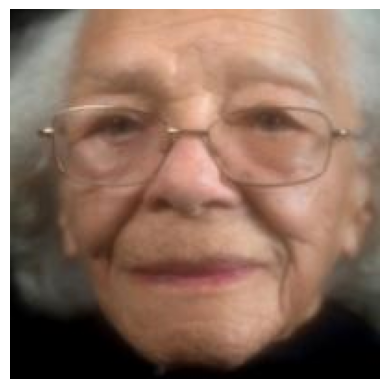

In [6]:
#Exploratory Data Analysis

from PIL import Image
img = Image.open(df['image'][5])
plt.axis('off')
plt.imshow(img)
print('Age: ', df['age'][5])
for i in range(100):
    if df['gender'][i] == 1:
        print("Female")
    else:
        print("Male")    

<Axes: xlabel='age', ylabel='Density'>

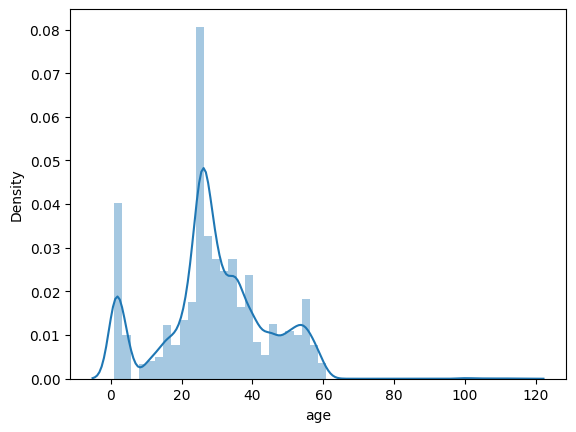

In [7]:
sns.distplot(df['age'])

<Axes: ylabel='count'>

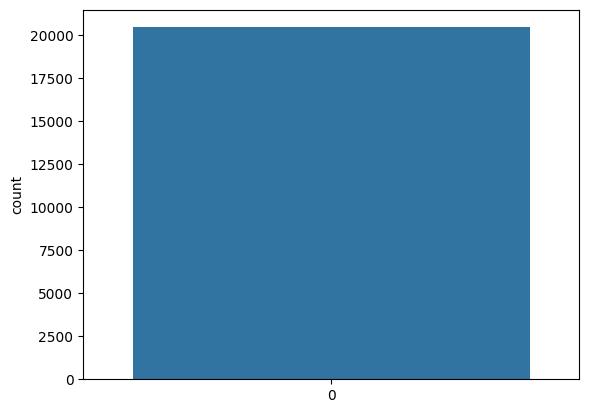

In [8]:
sns.countplot(data=df['gender'])

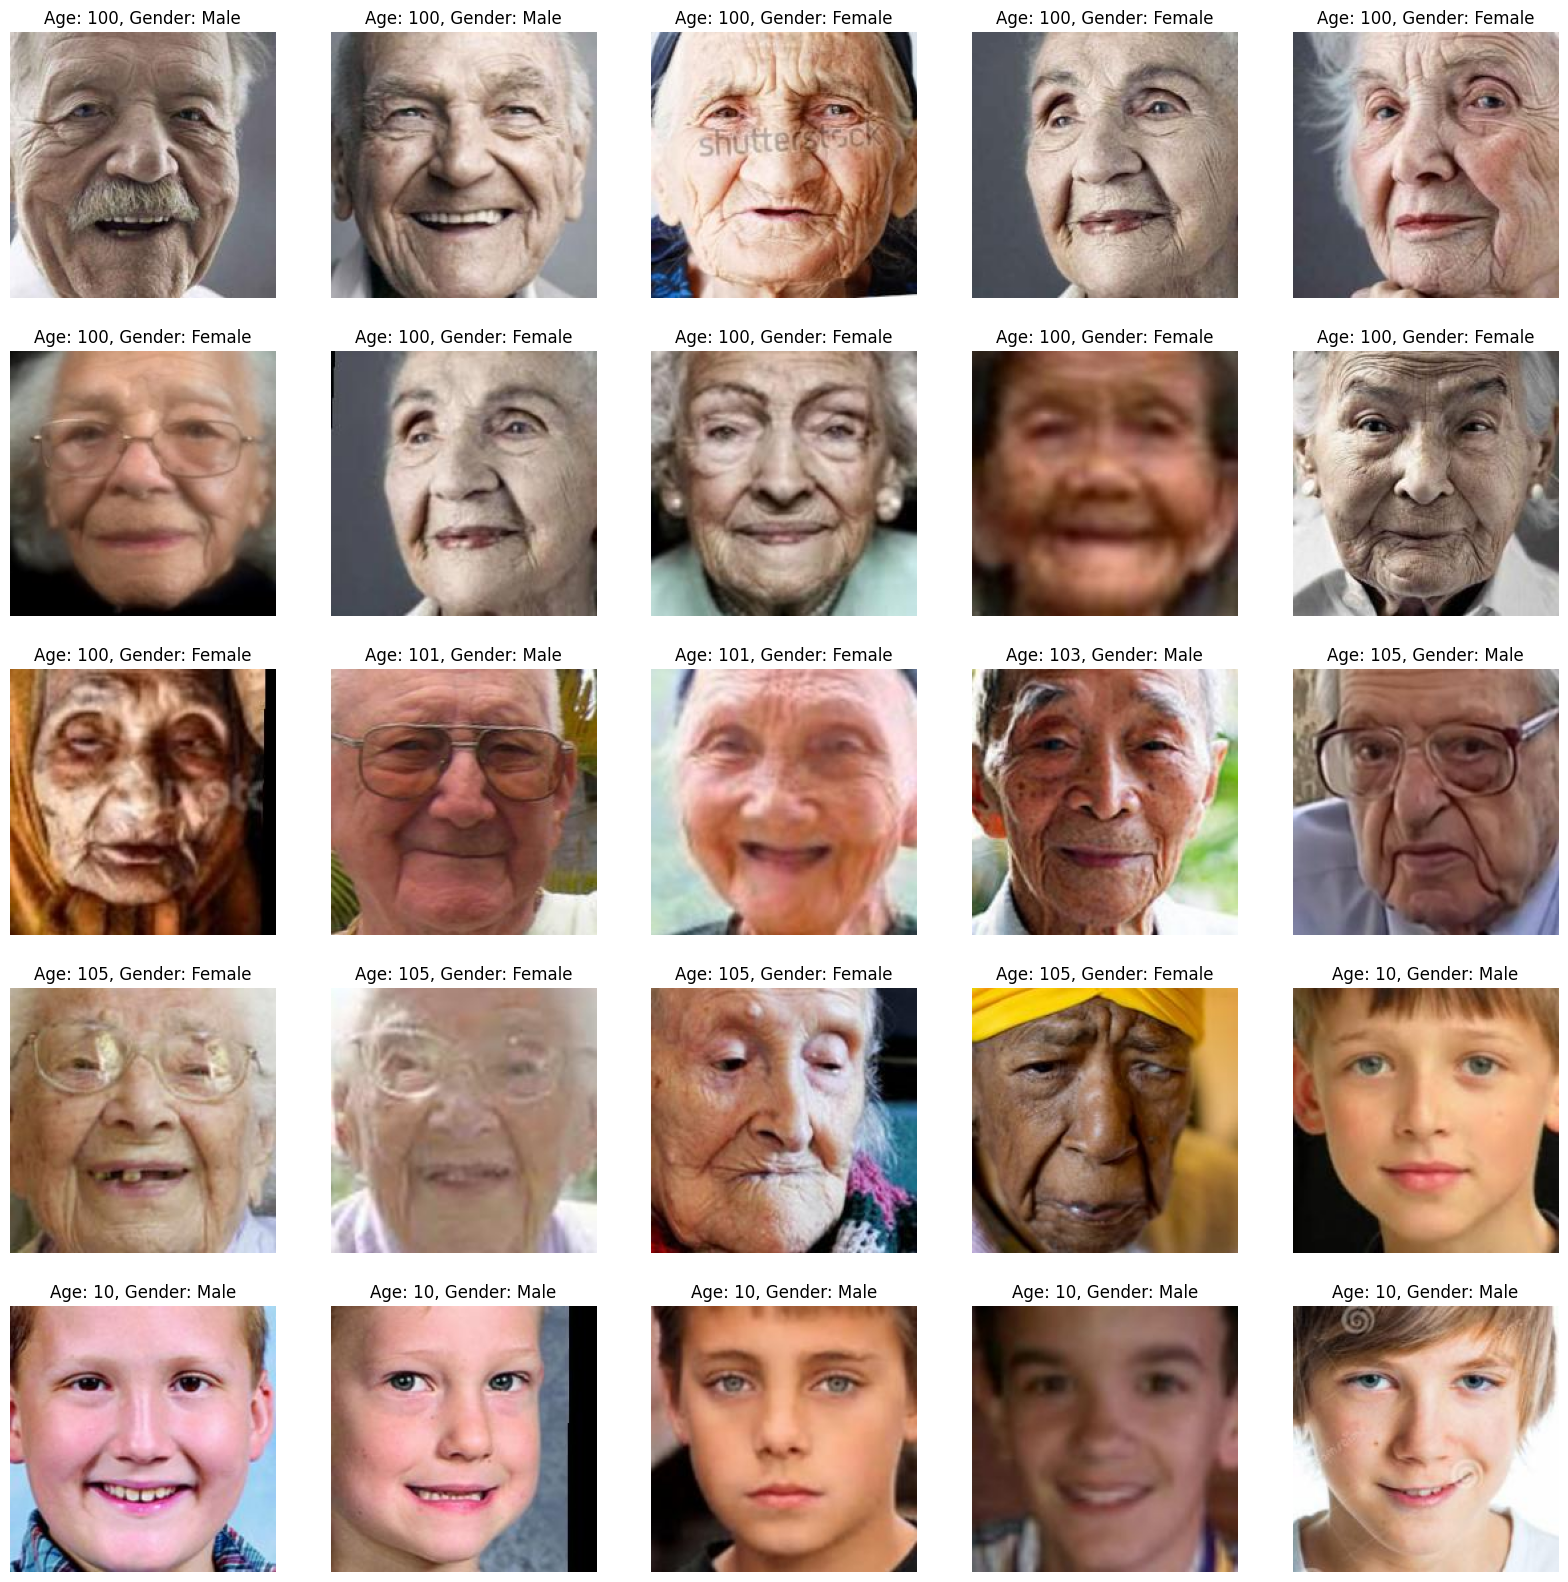

In [9]:
plt.figure(figsize=(20,20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age}, Gender: {gender_dict[gender]}")
    plt.axis('off')


In [10]:
# Feature Extraction

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128,128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [11]:
X = extract_features(df['image'])

  0%|          | 0/20434 [00:00<?, ?it/s]

In [12]:
X.shape

(20434, 128, 128, 1)

In [13]:
X = X/255.0

In [14]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [15]:
input_shape = (128, 128, 1)

Model Creation

In [16]:
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)


model = Model(inputs=[inputs], outputs=[output_1, output_2])


model.compile(loss=['categorical_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])



In [17]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
 26/511 [>.............................] - ETA: 4:02 - loss: 15.3303 - gender_out_loss: 0.0000e+00 - age_out_loss: 15.3303 - gender_out_accuracy: 0.4832 - age_out_accuracy: 0.0745

KeyboardInterrupt: 

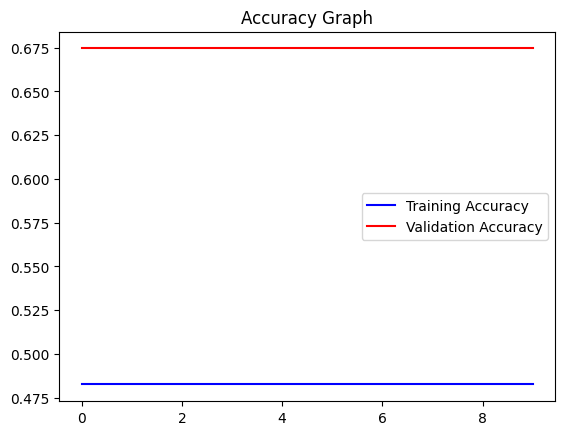

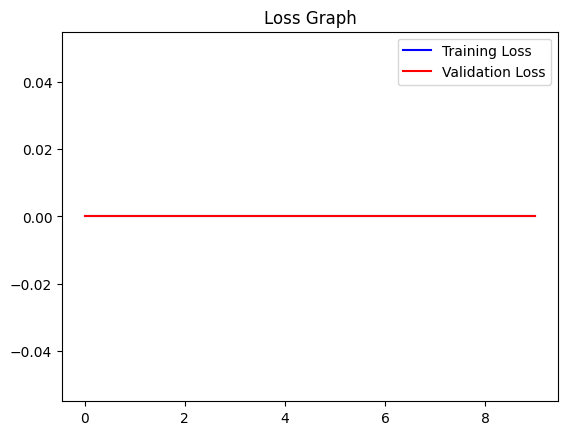

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

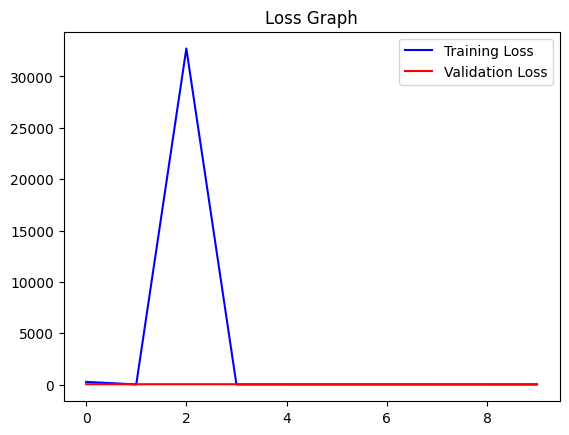

In [ ]:
# plot results for age
loss = history.history['age_out_loss']
val_loss = history.history['val_age_out_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Gender: Male Original Age: 10
1/1 [==============================] - 1s 1s/step
Male
Predicted Gender: Male Predicted Age: 5


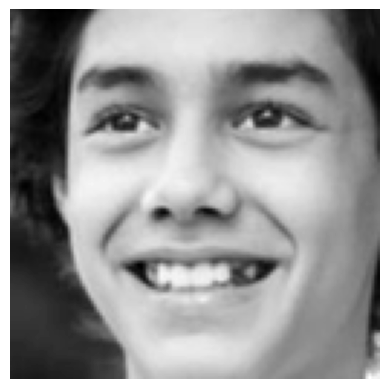

In [ ]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
print(pred_gender)
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Male Original Age: 21
1/1 [==============================] - 0s 97ms/step
Predicted Gender: Male Predicted Age: 5


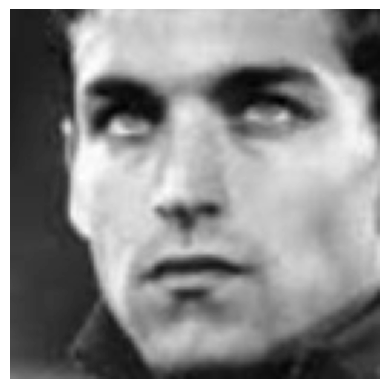

In [ ]:
image_index = 3000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 29
1/1 [==============================] - 0s 113ms/step
Predicted Gender: Male Predicted Age: 5


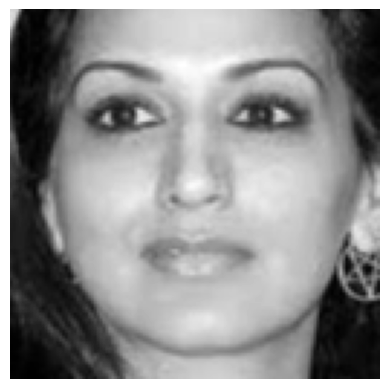

In [ ]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');